In [1]:
import os
import pandas as pd

In [2]:

single_read_dir = "../mgs-results/test_single_read"
paired_read_dir = "../mgs-results/test_paired_end"
test_dir = "../mgs-results/test"
full_test_dir = "../mgs-results/test-full"

se_output_dir = os.path.join(single_read_dir, "output")
pe_output_dir = os.path.join(paired_read_dir, "output")
test_output_dir = os.path.join(test_dir, "output")
full_test_output_dir = os.path.join(full_test_dir, "output")

se_results_dir = os.path.join(se_output_dir, "results")
pe_results_dir = os.path.join(pe_output_dir, "results")
test_results_dir = os.path.join(test_output_dir, "results")
full_test_results_dir = os.path.join(full_test_output_dir, "results")

se_qc_dir = os.path.join(se_results_dir, "qc")
pe_qc_dir = os.path.join(pe_results_dir, "qc")
test_qc_dir = os.path.join(test_results_dir, "qc")
full_test_qc_dir = os.path.join(full_test_results_dir, "qc")

se_basic_stats_path = os.path.join(se_qc_dir, "qc_basic_stats.tsv.gz")
se_adapter_stats_path = os.path.join(se_qc_dir, "qc_adapter_stats.tsv.gz")
se_quality_base_stats_path = os.path.join(se_qc_dir, "qc_quality_base_stats.tsv.gz")
se_quality_seq_stats_path = os.path.join(se_qc_dir, "qc_quality_sequence_stats.tsv.gz")



pe_basic_stats_path = os.path.join(pe_qc_dir, "qc_basic_stats.tsv.gz")
pe_adapter_stats_path = os.path.join(pe_qc_dir, "qc_adapter_stats.tsv.gz")
pe_quality_base_stats_path = os.path.join(pe_qc_dir, "qc_quality_base_stats.tsv.gz")
pe_quality_seq_stats_path = os.path.join(pe_qc_dir, "qc_quality_sequence_stats.tsv.gz")


test_basic_stats_path = os.path.join(test_qc_dir, "qc_basic_stats.tsv.gz")
test_adapter_stats_path = os.path.join(test_qc_dir, "qc_adapter_stats.tsv.gz")
test_quality_base_stats_path = os.path.join(test_qc_dir, "qc_quality_base_stats.tsv.gz")
test_quality_seq_stats_path = os.path.join(test_qc_dir, "qc_quality_sequence_stats.tsv.gz")

full_test_basic_stats_path = os.path.join(full_test_qc_dir, "qc_basic_stats.tsv.gz")
full_test_adapter_stats_path = os.path.join(full_test_qc_dir, "qc_adapter_stats.tsv.gz")
full_test_quality_base_stats_path = os.path.join(full_test_qc_dir, "qc_quality_base_stats.tsv.gz")
full_test_quality_seq_stats_path = os.path.join(full_test_qc_dir, "qc_quality_sequence_stats.tsv.gz")


In [3]:

## Comparing output of basic stats
# Load basic stats
se_basic_stats = pd.read_csv(se_basic_stats_path, sep='\t')
pe_basic_stats = pd.read_csv(pe_basic_stats_path, sep='\t')
test_basic_stats = pd.read_csv(test_basic_stats_path, sep='\t')
full_test_basic_stats = pd.read_csv(full_test_basic_stats_path, sep='\t')

# Checking if paired end version gives same result as original
print(pe_basic_stats.equals(full_test_basic_stats))
# print(full_test_basic_stats)


True


In [4]:
print("Single-end basic stats shape:", se_basic_stats.shape)
print("Paired-end basic stats shape:", pe_basic_stats.shape)

# Compare column names
print("\nColumn differences:")
se_cols = set(se_basic_stats.columns)
pe_cols = set(pe_basic_stats.columns)
print("Columns only in single-end:", se_cols - pe_cols)
print("Columns only in paired-end:", pe_cols - se_cols)

# Compare number of samples
print("\nNumber of samples:")
print("Single-end:", se_basic_stats['sample'].nunique())
print("Paired-end:", pe_basic_stats['sample'].nunique())

# Compare common columns
common_cols = list(se_cols.intersection(pe_cols))
for col in common_cols:
    if se_basic_stats[col].dtype != pe_basic_stats[col].dtype:
        print(f"\nDifferent data types for column '{col}':")
        print(f"Single-end: {se_basic_stats[col].dtype}")
        print(f"Paired-end: {pe_basic_stats[col].dtype}")

# Show a summary of numeric columns
print("\nSummary statistics comparison:")
print(se_basic_stats[common_cols].describe().subtract(pe_basic_stats[common_cols].describe(), fill_value=0))

Single-end basic stats shape: (16, 17)
Paired-end basic stats shape: (16, 17)

Column differences:
Columns only in single-end: set()
Columns only in paired-end: set()

Number of samples:
Single-end: 8
Paired-end: 8

Summary statistics comparison:
       percent_duplicates  n_read_pairs  mean_seq_len  percent_gc  \
count            0.000000      0.000000      0.000000         0.0   
mean             0.916571   2239.312500     -1.213075         0.0   
std              0.171653  -2341.716912      1.217164         0.0   
min              0.064595   5251.000000     -2.177928         0.0   
25%              1.460740   4512.500000     -2.525457         0.0   
50%              0.235158   1741.500000     -1.554187         0.0   
75%              0.600091      0.000000      0.000000         0.0   
max              1.678067      0.000000      0.000000         0.0   

       n_bases_approx  
count    0.000000e+00  
mean    -2.912500e+06  
std     -8.156787e+05  
min     -1.900000e+06  
25%     -2.

In [107]:
print(pe_basic_stats)

                   sample  percent_gc  mean_seq_len  n_read_pairs  \
0   230926Esv_D23-14904-1          51    150.000000         25000   
1   230926Esv_D23-14905-1          51    150.000000         25000   
2   230926Esv_D23-14906-1          51    150.000000         25000   
3   230926Esv_D23-14907-1          51    150.000000         25000   
4   230926Esv_D23-14908-1          51    150.000000         25000   
5   230926Esv_D23-14909-1          51    150.000000         25000   
6   230926Esv_D23-14910-1          51    150.000000         25000   
7   230926Esv_D23-14911-1          50    150.000000         25000   
8   230926Esv_D23-14904-1          51    134.892009         18997   
9   230926Esv_D23-14905-1          51    135.602129         19397   
10  230926Esv_D23-14906-1          51    136.248299         19843   
11  230926Esv_D23-14907-1          51    134.665718         20034   
12  230926Esv_D23-14908-1          51    138.181752         20041   
13  230926Esv_D23-14909-1         

In [108]:
## Comparing output of adapter stats
# Load test adapter stats
test_adapter_stats = pd.read_csv(test_adapter_stats_path, sep='\t')
se_adapter_stats = pd.read_csv(se_adapter_stats_path, sep='\t')
pe_adapter_stats = pd.read_csv(pe_adapter_stats_path, sep='\t')
full_test_adapter_stats = pd.read_csv(full_test_adapter_stats_path, sep='\t')
# Checking if paired end version gives same result as original

print(pe_adapter_stats.equals(test_adapter_stats))
print(pe_adapter_stats.equals(full_test_adapter_stats))

print(se_adapter_stats)
print(pe_adapter_stats)

True
True
      position  pc_adapters                sample                     adapter  \
0            1     0.000000  230926EsvD23-14904-1  illumina_universal_adapter   
1            2     0.000000  230926EsvD23-14904-1  illumina_universal_adapter   
2            3     0.000000  230926EsvD23-14904-1  illumina_universal_adapter   
3            4     0.000000  230926EsvD23-14904-1  illumina_universal_adapter   
4            5     0.016000  230926EsvD23-14904-1  illumina_universal_adapter   
...        ...          ...                   ...                         ...   
1179       130     0.744473  230926EsvD23-14911-1  illumina_universal_adapter   
1180       132     0.750591  230926EsvD23-14911-1  illumina_universal_adapter   
1181       134     0.750591  230926EsvD23-14911-1  illumina_universal_adapter   
1182       136     0.750591  230926EsvD23-14911-1  illumina_universal_adapter   
1183       138     0.750591  230926EsvD23-14911-1  illumina_universal_adapter   

      read_pair  

<Axes: xlabel='position', ylabel='pc_adapters'>

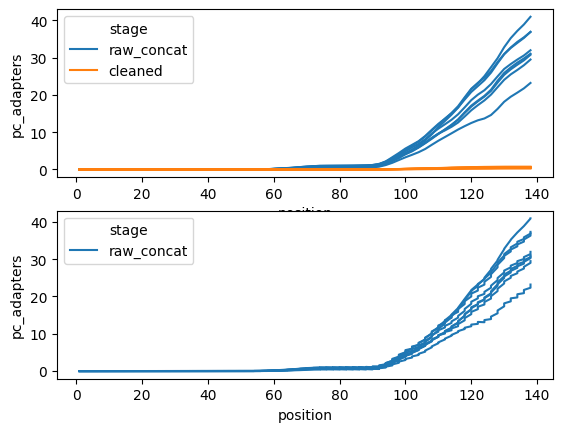

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1)
sns.lineplot(data=se_adapter_stats, x='position', y='pc_adapters', hue='stage', ax=axs[0],units="sample", estimator=None, legend=True)
sns.lineplot(data=pe_adapter_stats, x='position', y='pc_adapters', hue='stage', ax=axs[1],units="sample", estimator=None, legend=True)



In [110]:
## Comparing output of quality base stats
# Load test quality base stats
test_quality_base_stats = pd.read_csv(test_quality_base_stats_path, sep='\t')
se_quality_base_stats = pd.read_csv(se_quality_base_stats_path, sep='\t')
pe_quality_base_stats = pd.read_csv(pe_quality_base_stats_path, sep='\t')
full_test_quality_base_stats = pd.read_csv(full_test_quality_base_stats_path, sep='\t')
# Checking if paired end version gives same result as original

print(pe_quality_base_stats.equals(test_quality_base_stats))



True


In [88]:
print(pe_quality_base_stats)

      position  mean_phred_score                 sample  read_pair       stage
0            1         36.989000  230926Esv_D23-14904-1          1  raw_concat
1            2         40.762760  230926Esv_D23-14904-1          1  raw_concat
2            3         41.218840  230926Esv_D23-14904-1          1  raw_concat
3            4         41.238560  230926Esv_D23-14904-1          1  raw_concat
4            5         29.468920  230926Esv_D23-14904-1          1  raw_concat
...        ...               ...                    ...        ...         ...
1211       132         26.939509  230926Esv_D23-14911-1          2     cleaned
1212       137         26.343795  230926Esv_D23-14911-1          2     cleaned
1213       142         26.219437  230926Esv_D23-14911-1          2     cleaned
1214       147         26.608716  230926Esv_D23-14911-1          2     cleaned
1215       150         26.670302  230926Esv_D23-14911-1          2     cleaned

[1216 rows x 5 columns]


<Axes: xlabel='position', ylabel='mean_phred_score'>

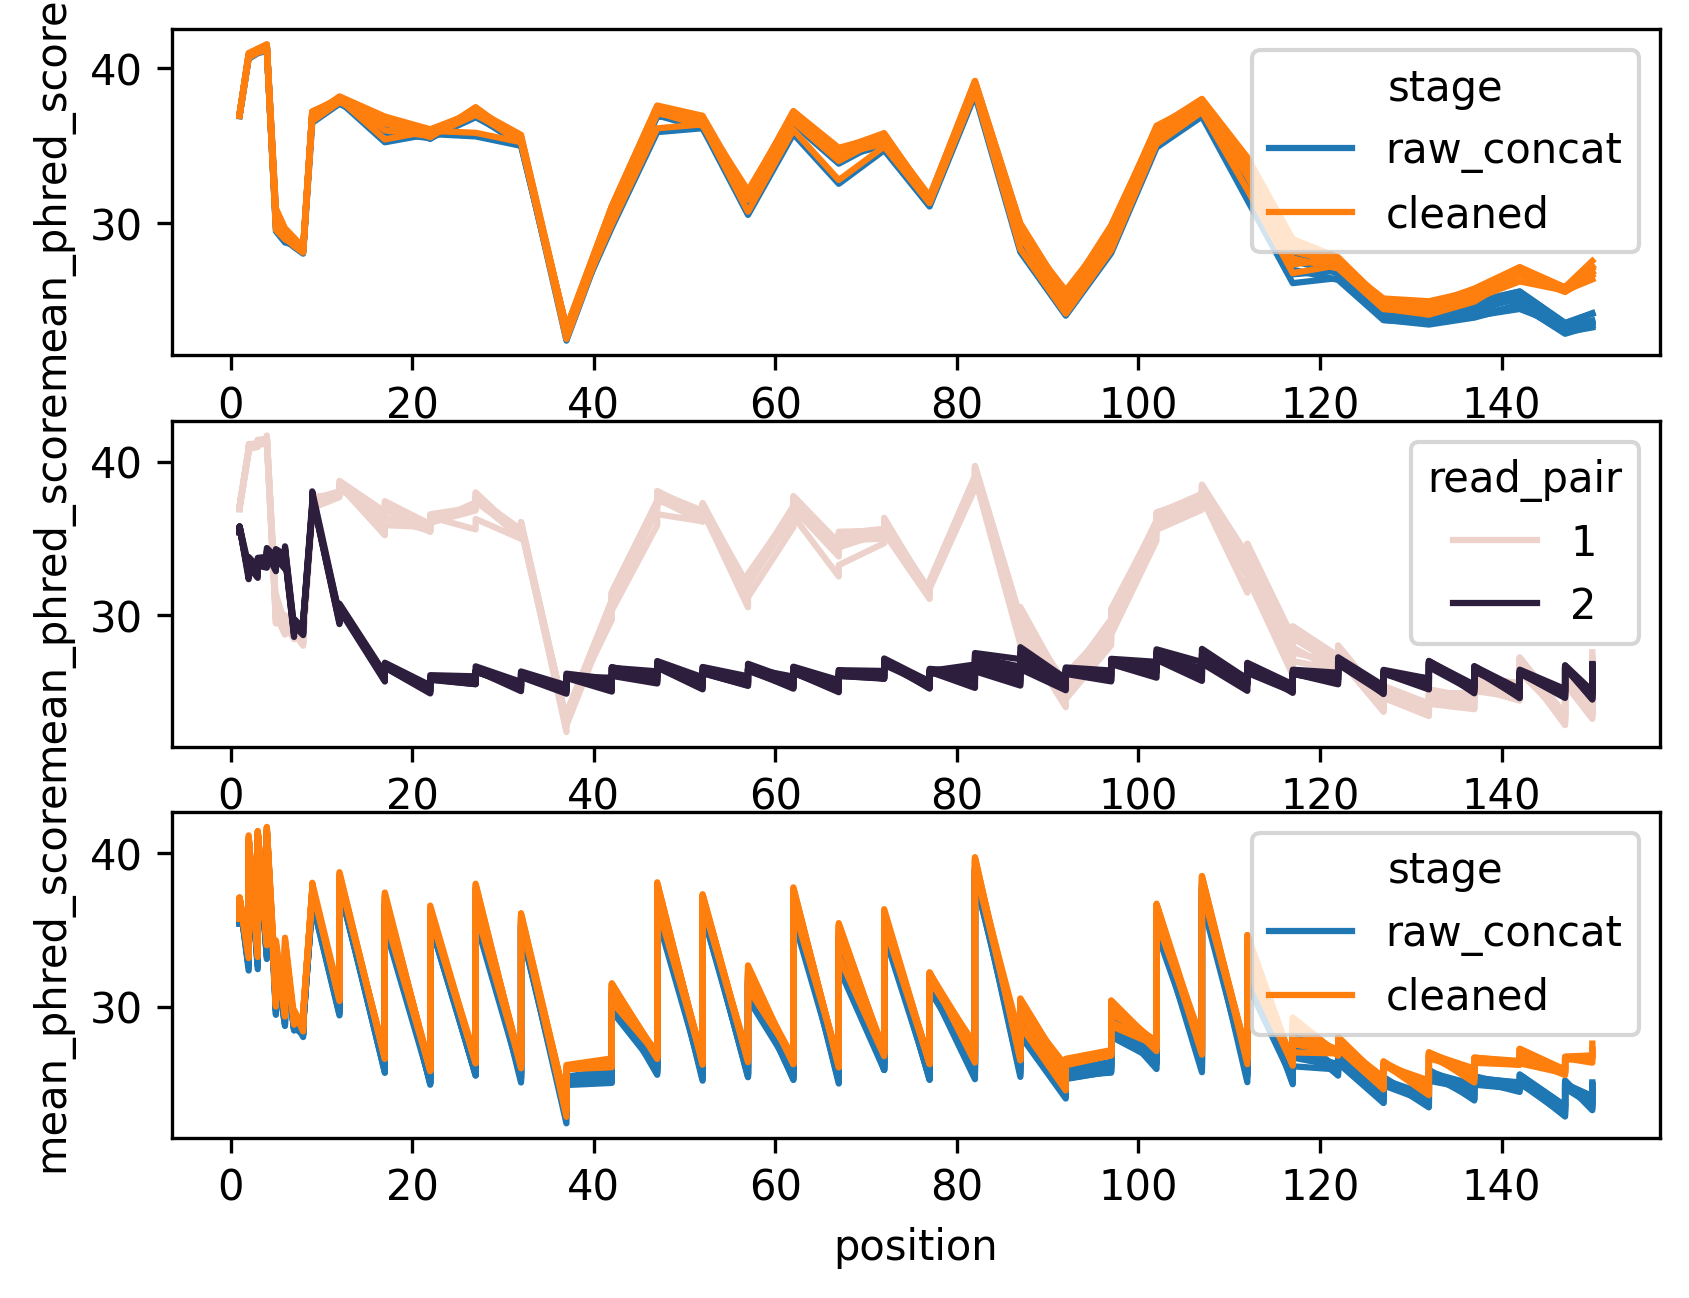

In [111]:
fig, axs = plt.subplots(3, 1, dpi=300)
sns.lineplot(data=se_quality_base_stats, x='position', y='mean_phred_score', hue='stage', ax=axs[0],units="sample", estimator=None, legend=True)
sns.lineplot(data=pe_quality_base_stats, x='position', y='mean_phred_score', hue='read_pair', ax=axs[1],units="sample", estimator=None, legend=True)
sns.lineplot(data=full_test_quality_base_stats, x='position', y='mean_phred_score', hue='stage', ax=axs[2],units="sample", estimator=None, legend=True)



            count       mean       std        min        25%        50%  \
stage                                                                     
cleaned     608.0  30.578163  4.927676  22.826089  26.513279  28.614462   
raw_concat  608.0  29.737838  5.182085  22.400800  25.428674  28.083968   

                  75%        max  
stage                             
cleaned     35.389832  41.713038  
raw_concat  34.706314  41.514760  
            count       mean       std        min        25%        50%  \
stage                                                                     
cleaned     608.0  30.578163  4.927676  22.826089  26.513279  28.614462   
raw_concat  608.0  29.737838  5.182085  22.400800  25.428674  28.083968   

                  75%        max  
stage                             
cleaned     35.389832  41.713038  
raw_concat  34.706314  41.514760  


In [94]:
## Comparing output of quality sequence stats
# Load test quality sequence stats
test_quality_seq_stats = pd.read_csv(test_quality_seq_stats_path, sep='\t')
se_quality_seq_stats = pd.read_csv(se_quality_seq_stats_path, sep='\t')
pe_quality_seq_stats = pd.read_csv(pe_quality_seq_stats_path, sep='\t')
full_test_quality_seq_stats = pd.read_csv(full_test_quality_seq_stats_path, sep='\t')
# Checking if paired end version gives same result as original
print(pe_quality_seq_stats.equals(full_test_quality_seq_stats))


True


     mean_phred_score  n_sequences                sample  read_pair  \
0                  13            1  230926EsvD23-14904-1          1   
1                  14            1  230926EsvD23-14904-1          1   
2                  15            4  230926EsvD23-14904-1          1   
3                  16            6  230926EsvD23-14904-1          1   
4                  17            6  230926EsvD23-14904-1          1   
..                ...          ...                   ...        ...   
314                35         2548  230926EsvD23-14911-1          1   
315                36         1502  230926EsvD23-14911-1          1   
316                37          702  230926EsvD23-14911-1          1   
317                38          220  230926EsvD23-14911-1          1   
318                39            8  230926EsvD23-14911-1          1   

          stage  
0    raw_concat  
1    raw_concat  
2    raw_concat  
3    raw_concat  
4    raw_concat  
..          ...  
314     cleaned  
315

<Axes: xlabel='mean_phred_score', ylabel='n_sequences'>

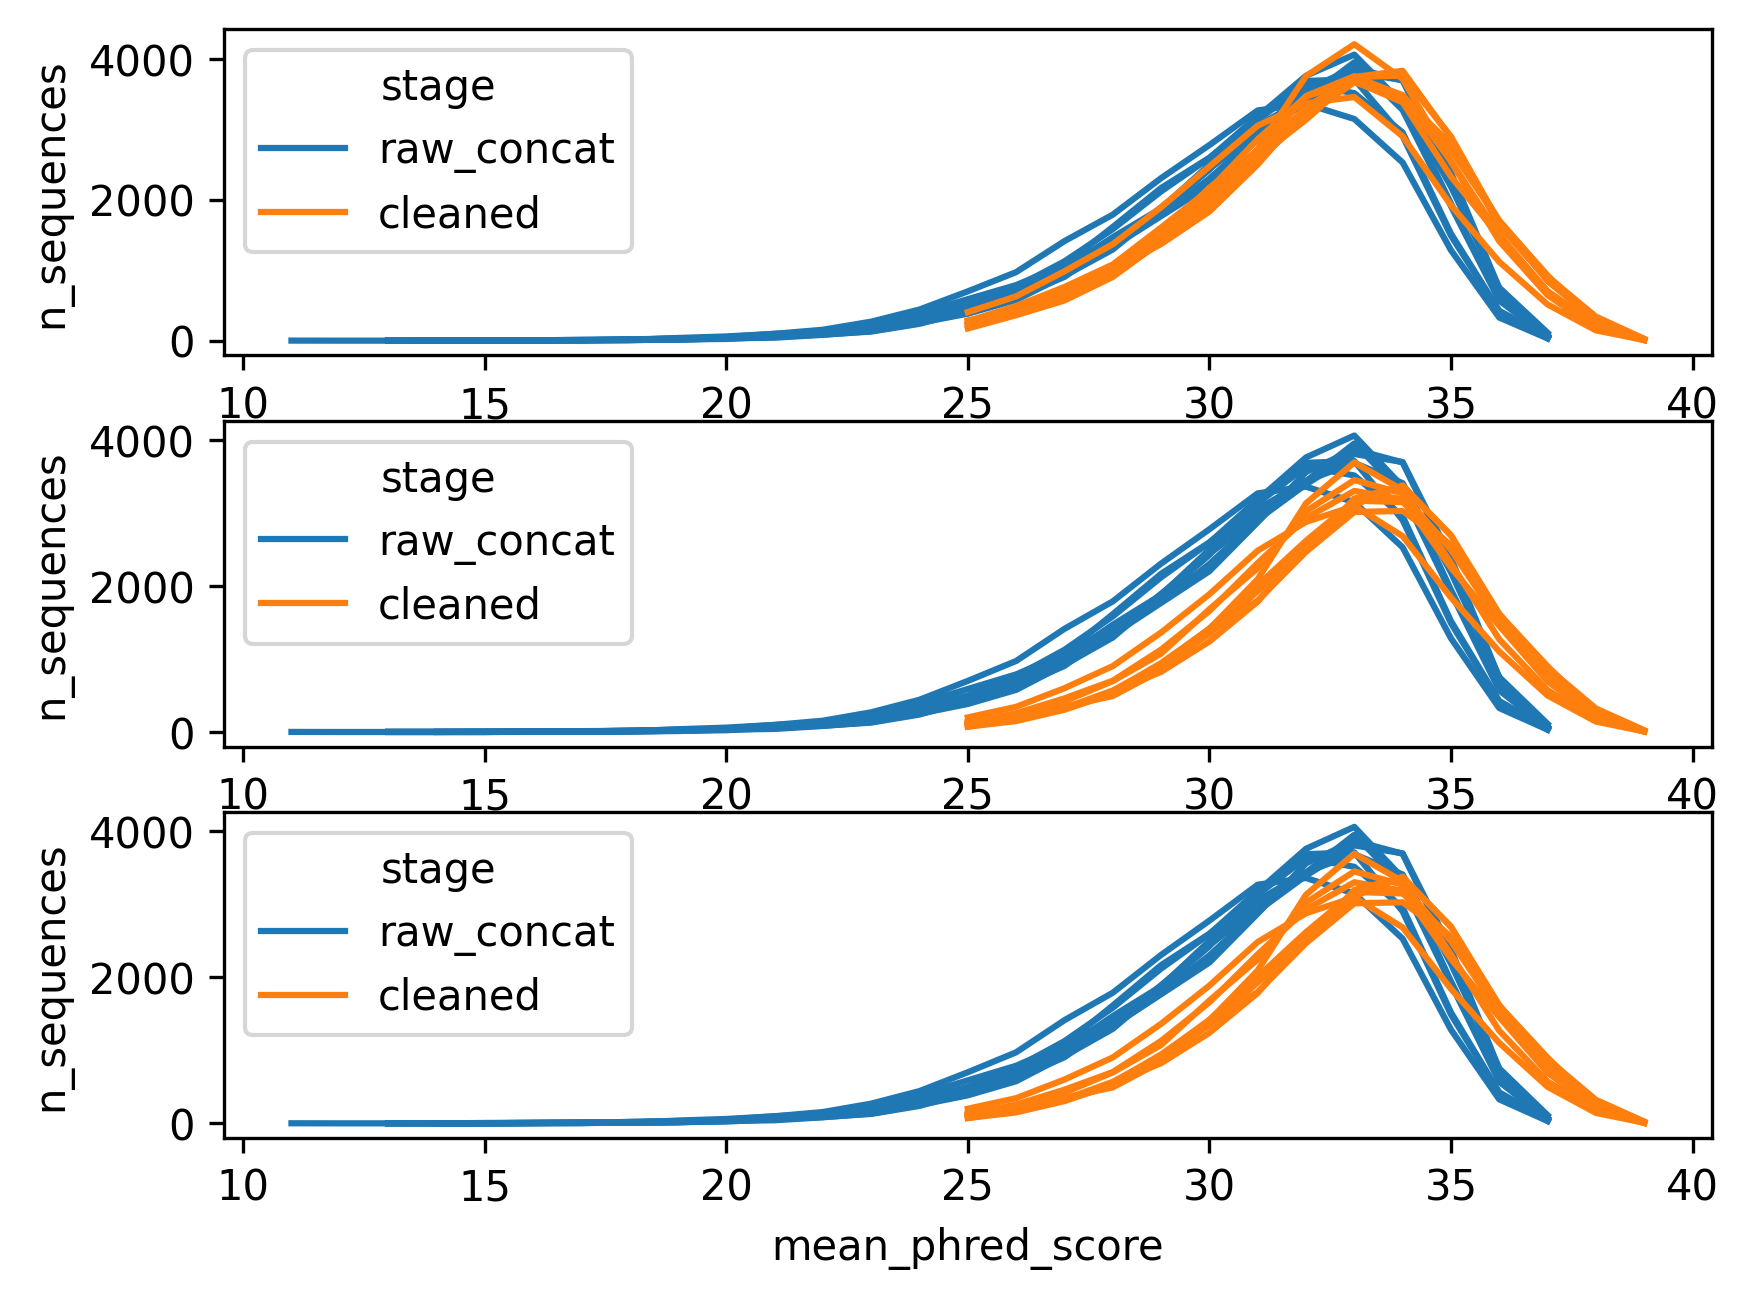

In [102]:
print(se_quality_seq_stats)

fig, axs = plt.subplots(3, 1, dpi=300)
sns.lineplot(data=se_quality_seq_stats, x='mean_phred_score', y='n_sequences', hue='stage', ax=axs[0],units="sample", estimator=None, legend=True)

pe_quality_seq_stats_1 = pe_quality_seq_stats[pe_quality_seq_stats['read_pair'] == 1]
sns.lineplot(data=pe_quality_seq_stats_1, x='mean_phred_score', y='n_sequences', hue='stage', ax=axs[1],units="sample", estimator=None, legend=True)


full_test_quality_seq_stats_1 = full_test_quality_seq_stats[full_test_quality_seq_stats['read_pair'] == 1]
sns.lineplot(data=full_test_quality_seq_stats_1, x='mean_phred_score', y='n_sequences', hue='stage', ax=axs[2],units="sample", estimator=None, legend=True)
